# Appendix 2: Data Series and Plotting

This appendix describes using the `pandas` toolbox to read in and organize data in series form along with `matplotlib` for various plotting functions.  Only very basic functionality will be shown, but once you have the idea it is pretty easy to find examples for all kinds of uses online which you modify to achieve your goals.  For a quick but intense introduction to pandas, see: https://pandas.pydata.org/docs/user_guide/10min.html.  To figure out how to plot things in Matplotlib, I recommend doing a Google search for what you want to do. 

___
## 1. Set up Python

This appendix is a Jupyter notebook and has interactive running of Python commands.  Feel free to make a copy and modify the commands to experiment with variations.  

Start by activating your virtual environment (if you have one, see Chapter 12) and in the terminal window install the following toolboxes:
```
$ python -m pip install pandas matplotlib
```
Next you are ready to load the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

These imports will enable us to use `pd` to refer to pandas, `np` for numpy and `plt` for matplotlib's pyplot.
___
## 2. Read and Organize Stockmarket Values

A convenient relatively large dataset is the S&P 500 stock index.  Download monthly historical data on for index SPX from this website: https://stooq.com/q/d/?s=%5Espx&c=0&i=m, and copy the file `^spx_m.csv` to the `Data` folder within the current folder. If you open this file in a text editor you will see the top few lines contain a header line and data with elements separated by commas.  The `.csv` stands for *comma separated values* even though sometimes the values could be separated by other characters such as spaces:
```
Date,Open,High,Low,Close,Volume
1789-05-31,0.51,0.51,0.51,0.51
1789-06-30,0.51,0.51,0.51,0.51
1789-07-31,0.5,0.5,0.5,0.5
1789-08-31,0.5,0.51,0.5,0.51
...
```
Let's load this using `pandas` and take a look at the contents:

In [44]:
spx = pd.read_csv('Data/^spx_m.csv')
spx

,Date,Open,High,Low,Close,Volume
0,1789-05-31,0.51,0.51,0.51,0.51,NaN
1,1789-06-30,0.51,0.51,0.51,0.51,NaN
2,1789-07-31,0.50,0.50,0.50,0.50,NaN
3,1789-08-31,0.50,0.51,0.50,0.51,NaN
4,1789-09-30,0.51,0.51,0.50,0.51,NaN
...,...,...,...,...,...,...
2789,2022-02-28,4519.57,4595.31,4114.65,4373.94,5.074627e+10
2790,2022-03-31,4363.14,4637.30,4157.87,4530.41,6.190108e+10
2791,2022-04-30,4540.32,4593.45,4124.28,4131.93,4.920787e+10
2792,2022-05-31,4130.61,4307.66,3810.32,4132.15,5.529092e+10


Pandas conveniently shows the column headers and the row indices for the first and last 5 rows.  The `NaN` (meaning Not-a-Number) occurs because all the rows before 1950 are missing the Volume element.  We can extract any of the columns like this:

In [45]:
spx['Date']

0       1789-05-31
1       1789-06-30
2       1789-07-31
3       1789-08-31
4       1789-09-30
           ...    
2789    2022-02-28
2790    2022-03-31
2791    2022-04-30
2792    2022-05-31
2793    2022-06-30
Name: Date, Length: 2794, dtype: object

Notice that this is of type `object`, which is not so useful.  We can convert it to date format so that pandas can arrange plotting with dates correctly.

In [46]:
spx['Date'] = pd.to_datetime(spx['Date'])
spx['Date']

0      1789-05-31
1      1789-06-30
2      1789-07-31
3      1789-08-31
4      1789-09-30
          ...    
2789   2022-02-28
2790   2022-03-31
2791   2022-04-30
2792   2022-05-31
2793   2022-06-30
Name: Date, Length: 2794, dtype: datetime64[ns]

Notice that the type is now: `datetime64[ns]`.  Let's make the `Date` be the index for the array, so that our plots will have `Date` on the horizontal axis:

In [60]:
spx.set_index('Date',inplace=True)  # Without doing inplace, a copy is made and spx is not updated
spx

,Open,High,Low,Close,Volume
Date,,,,,
1789-05-31,0.51,0.51,0.51,0.51,NaN
1789-06-30,0.51,0.51,0.51,0.51,NaN
1789-07-31,0.50,0.50,0.50,0.50,NaN
1789-08-31,0.50,0.51,0.50,0.51,NaN
1789-09-30,0.51,0.51,0.50,0.51,NaN
...,...,...,...,...,...
2022-02-28,4519.57,4595.31,4114.65,4373.94,5.074627e+10
2022-03-31,4363.14,4637.30,4157.87,4530.41,6.190108e+10
2022-04-30,4540.32,4593.45,4124.28,4131.93,4.920787e+10


Notice that `Date` is now the index column.  
___
# 3. Plotting Data Series

Let's plot the stock price open price:

Text(0, 0.5, 'SPX')

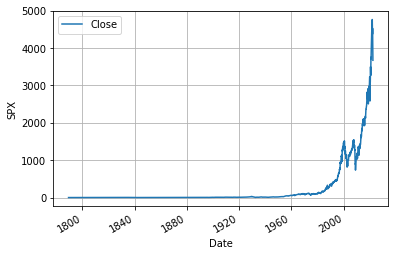

In [95]:
fig = plt.figure()
spx['Close'].plot()
plt.legend()
plt.grid()
plt.ylabel('SPX')

It looks like most of the absolute gains occur since 2000, but we can use log scaling on the y axis to see relative gains (all without adjustment for inflation):

Text(0, 0.5, 'SPX')

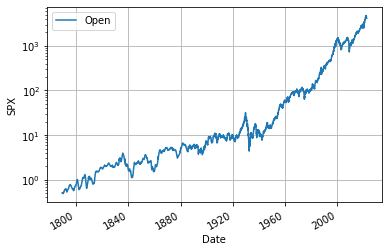

In [90]:
fig = plt.figure()
spx['Close'].plot(logy=True)
plt.legend()
plt.grid()
plt.ylabel('SPX')

Let's extract all the data from the 1980's.  We'll use the colon slice operation, which for `pandas` indexing is inclusive of the first *and last* element, unlike for lists and arrays.  

In [63]:
spx80s = spx['1980-01-01':'1989-12-31']
spx80s


,Open,High,Low,Close,Volume
Date,,,,,
1980-01-31,107.94,117.17,103.26,114.16,6.434667e+08
1980-02-29,114.16,120.22,111.33,113.66,5.314056e+08
1980-03-31,113.66,114.34,94.23,102.09,4.869167e+08
1980-04-30,102.09,106.79,98.95,106.29,3.745222e+08
1980-05-31,106.29,112.72,103.50,111.24,4.249556e+08
...,...,...,...,...,...
1989-08-31,346.08,352.73,339.00,351.45,2.193944e+09
1989-09-30,351.45,354.13,341.37,349.15,1.686122e+09
1989-10-31,349.15,360.44,327.12,340.36,2.229261e+09


Now let's plot the month gains and losses for this time period as bars  Here's a simple way to do that:

Text(0, 0.5, 'SPX')

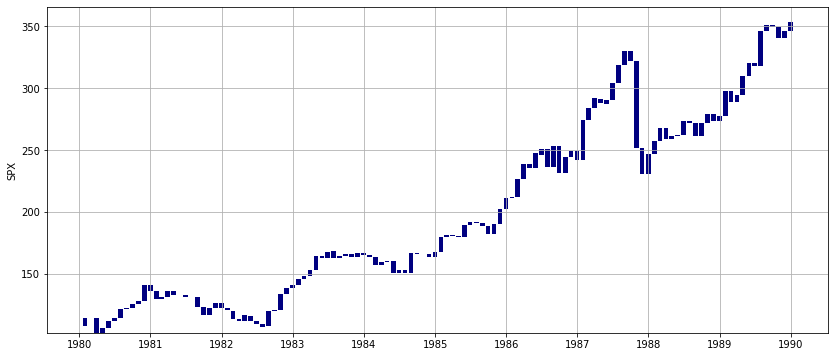

In [94]:
fig = plt.figure(figsize=(14,6))
monthly_gain = np.abs(spx80s['Close']-spx80s['Open'])       # bar height is absolute difference
monthly_bottom = np.minimum(spx80s['Open'],spx80s['Close']) # bar bottom is minimum of open and close
plt.bar( spx80s.index, monthly_gain, bottom=monthly_bottom, width=24,color=(0,0,0.5))  # bar width is 24 days
plt.grid()
plt.ylabel('SPX')
plt.title('1980s Stock Values')

It is a bit more informative if we plot gains and losses in different colors.  We can do that as follows:

Text(0.5, 1.0, '1980s Stock Values')

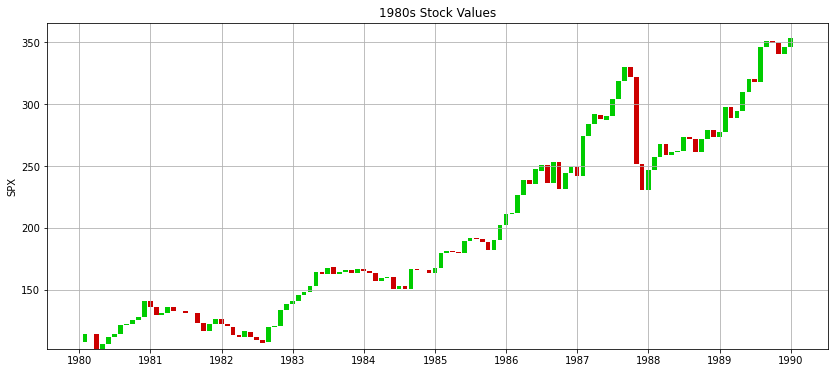

In [123]:
fig = plt.figure(figsize=(14,6))
monthly_gain = spx80s['Close']-spx80s['Open']
pos = monthly_gain>0        # An array with True for gains and False for loses
neg = np.logical_not(pos)   # The logical not of pos
monthly_bottom = np.minimum(spx80s['Open'],spx80s['Close'])
plt.bar( spx80s.index[pos], monthly_gain[pos], bottom=monthly_bottom[pos], width=24,color=(0,.8,0))
plt.bar( spx80s.index[neg], -monthly_gain[neg], bottom=monthly_bottom[neg], width=24,color=(.8,0,0))
plt.grid()
plt.ylabel('SPX')
plt.title('1980s Stock Values')

Another way to look at the data is whether or not the current closing price is the highest it has been or if it is lower than a previous close.  Let's do this analysis for all months since 1920.

In [125]:
# First find which closes are higher than pervious values:
spx20 = spx['1919-12-31'::]
new_high = []
high_so_far=0
for close in spx20['Close']:
    if close > high_so_far:
        new_high.append(True)
        high_so_far = close
    else:
        new_high.append(False)
new_high = np.array(new_high)
not_high = np.logical_not(new_high)
spx20['New High'] = spx20['Close'].copy()   # These are new highs.  Use .copy() as otherwise returns a reference
spx20.loc[not_high,'New High'] = np.nan
spx20['Lower'] = spx20['Close'].copy()      # These are lower than previous highs
spx20.loc[new_high,'Lower'] = np.nan


C:\Users\morri\AppData\Local\Temp\ipykernel_22900\1862798657.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx20['New High'] = spx20['Close'].copy()   # These are new highs.  Use .copy() as otherwise returns a reference
C:\Users\morri\AppData\Local\Temp\ipykernel_22900\1862798657.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx20['Lower'] = spx20['Close'].copy()      # These are lower than previous highs


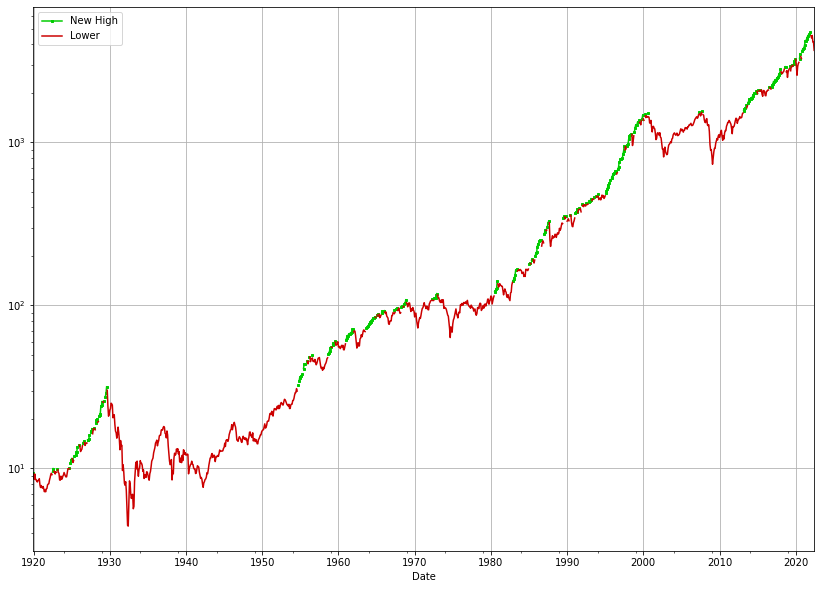

In [124]:
fig = plt.figure(figsize=(14,10))
spx20['New High'].plot(logy=True, marker='s', markersize=2,  color=(0,0.8,0))
spx20['Lower'].plot(logy=True, color=(0.8,0,0))
plt.legend()
# I want vertical grid lines to align with the start of each decade:
datelist = pd.date_range(start='1920-01-01', periods=11, freq=pd.offsets.MonthBegin(120))
plt.xticks(datelist,datelist.year)
plt.grid()

It is interesting to compare the stock index performance over various decades.  Note that inflation is not accounted fo, so real gains are lower than shown here.

___
### [Outline](README.md)